<a href="https://colab.research.google.com/github/arnab-mkj/Time_Series/blob/main/Time_series_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
!kaggle competitions download -c tabular-playground-series-sep-2022

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [3]:
import os
train=pd.read_csv("/content/tabular_playground_series/train.csv")
test=pd.read_csv("/content/tabular_playground_series/test.csv")

In [5]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


Text(0.5, 1.0, '\nBasic time series of sales\n')

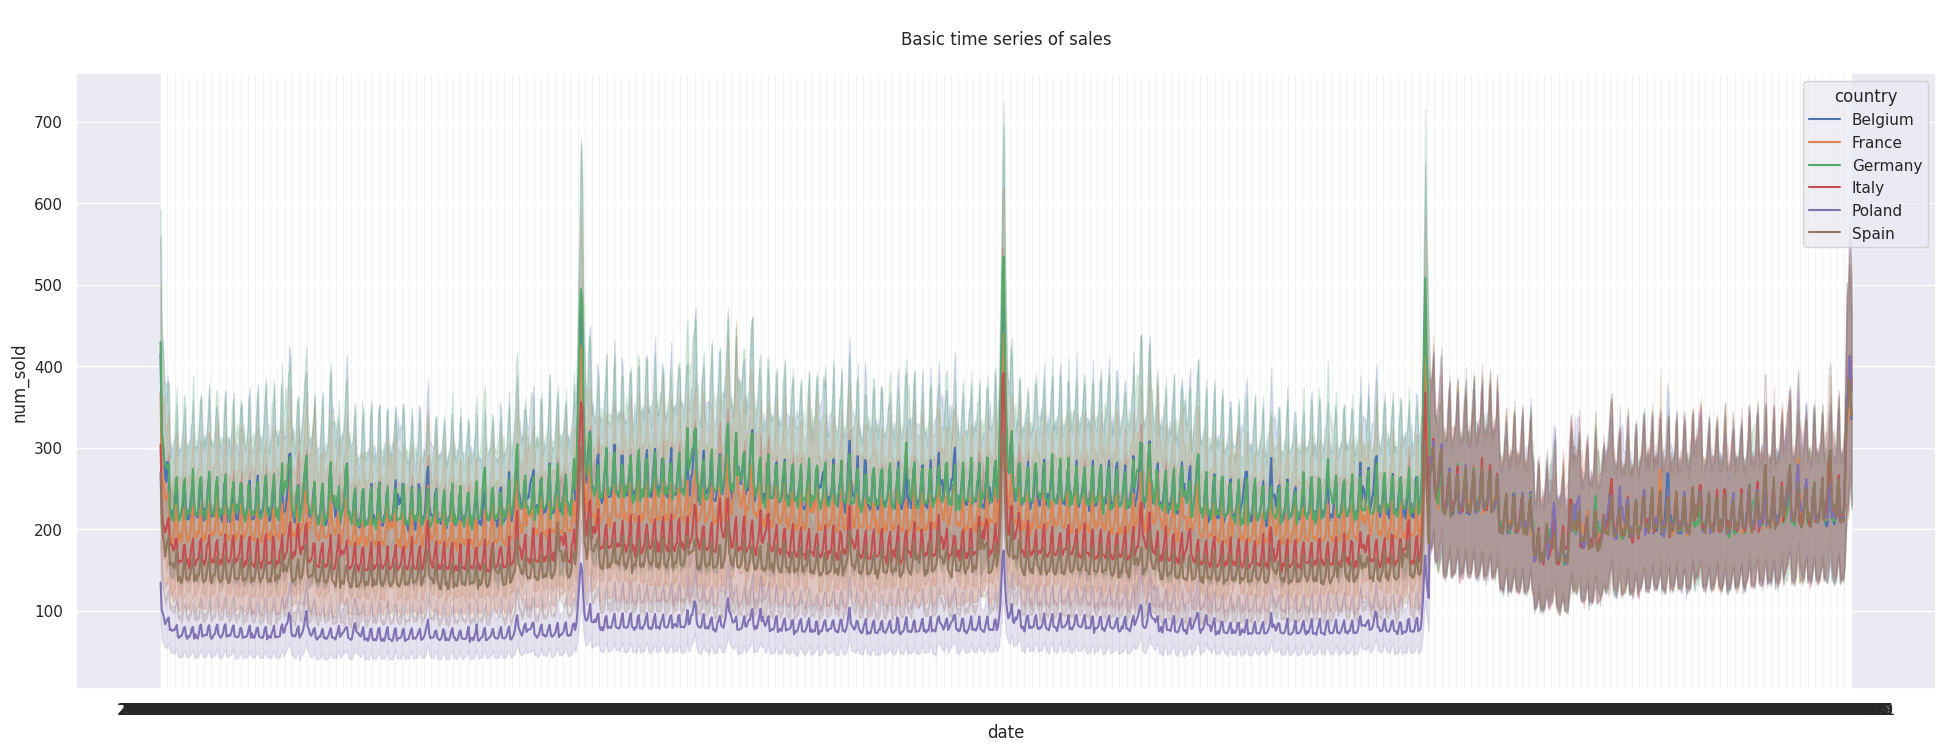

In [4]:
sns.set(rc={'figure.figsize':(24,8)})
ax = sns.lineplot(data=train, x='date', y='num_sold', hue = 'country')
ax.axes.set_title("\nBasic time series of sales\n")

Text(0.5, 1.0, '\nBasic time series of sales\n')

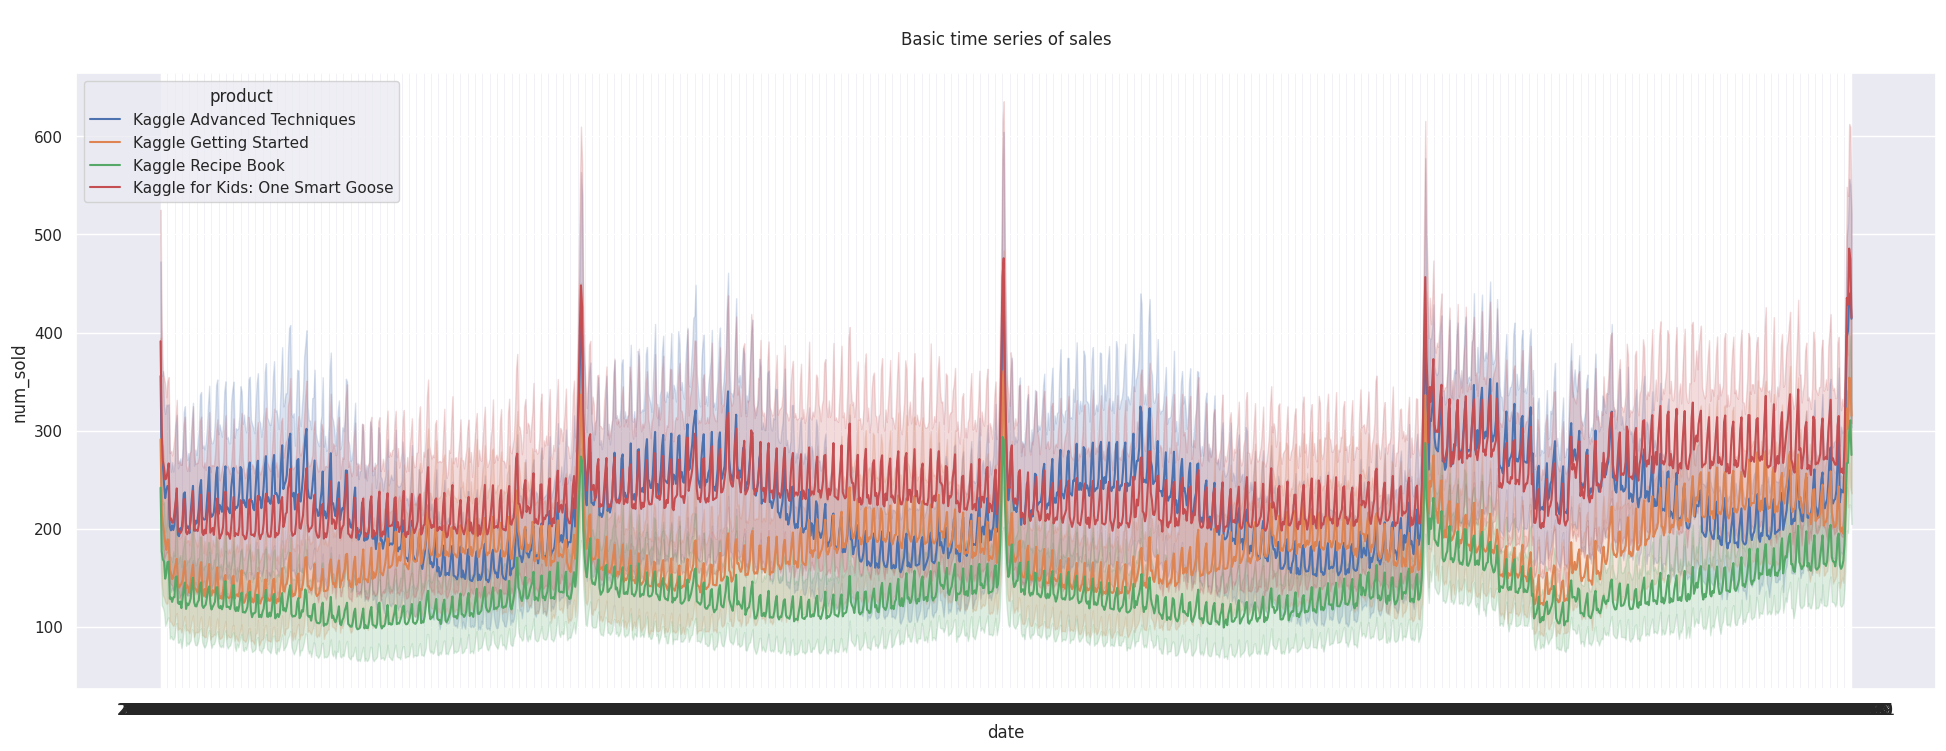

In [5]:
sns.set(rc={'figure.figsize':(24,8)})
ax = sns.lineplot(data=train, x='date', y='num_sold', hue = 'product')
ax.axes.set_title("\nBasic time series of sales\n")

Text(0.5, 1.0, '\nBasic time series of sales\n')

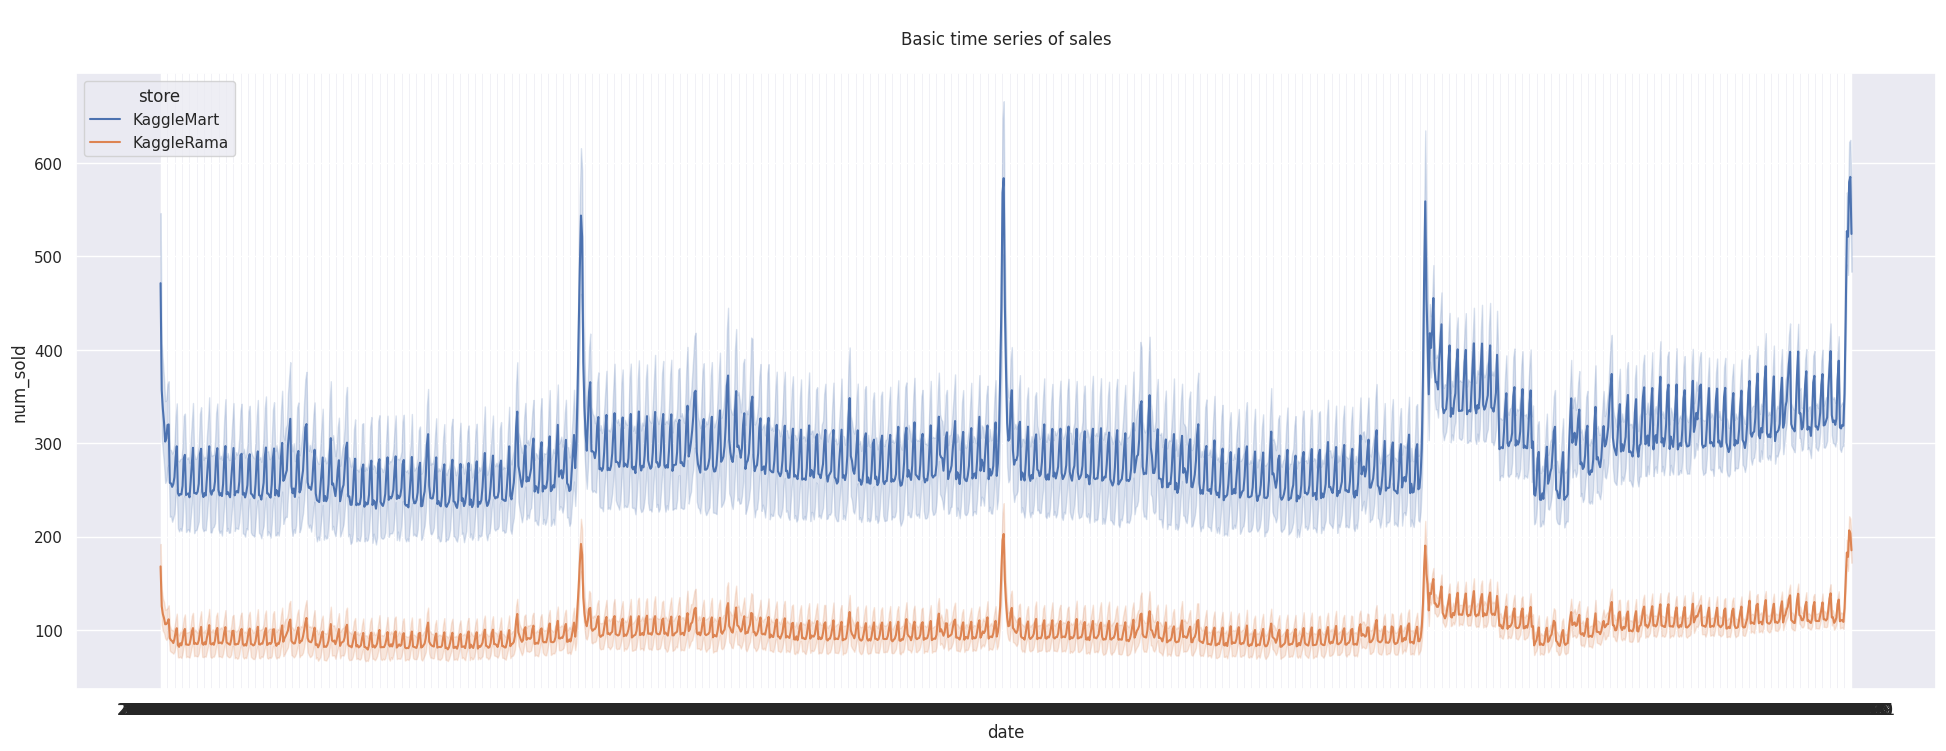

In [6]:
sns.set(rc={'figure.figsize':(24,8)})
ax = sns.lineplot(data=train, x='date', y='num_sold', hue = 'store')
ax.axes.set_title("\nBasic time series of sales\n")

In [7]:
!pip install scalecast --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 84.3 MB/s eta 0:00:00
  Created wheel for scalecast: filename=SCALECAST-0.19.10-py3-none-any.whl size=126500 sha256=35f3d74dbf68c3becd42bcb36992aa0725e09b542fe15b14bc00cd521a7d5c21
  Stored in directory: /root/.cache/pip/wheels/3a/b9/7e/54d918fc394c9da882e0fcdb979b2b0f7a3a440d4f4def81d0
Successfully built scalecast


In [11]:
import pickle
from scalecast.Forecaster import Forecaster

sns.set(rc={'figure.figsize':(25,8)})

df = train[(train['country']=='Belgium') & (train['product']=='Kaggle Advanced Techniques')&(train['store']=='KaggleMart')]

In [12]:
f = Forecaster(y=df.num_sold, current_dates=df.date)

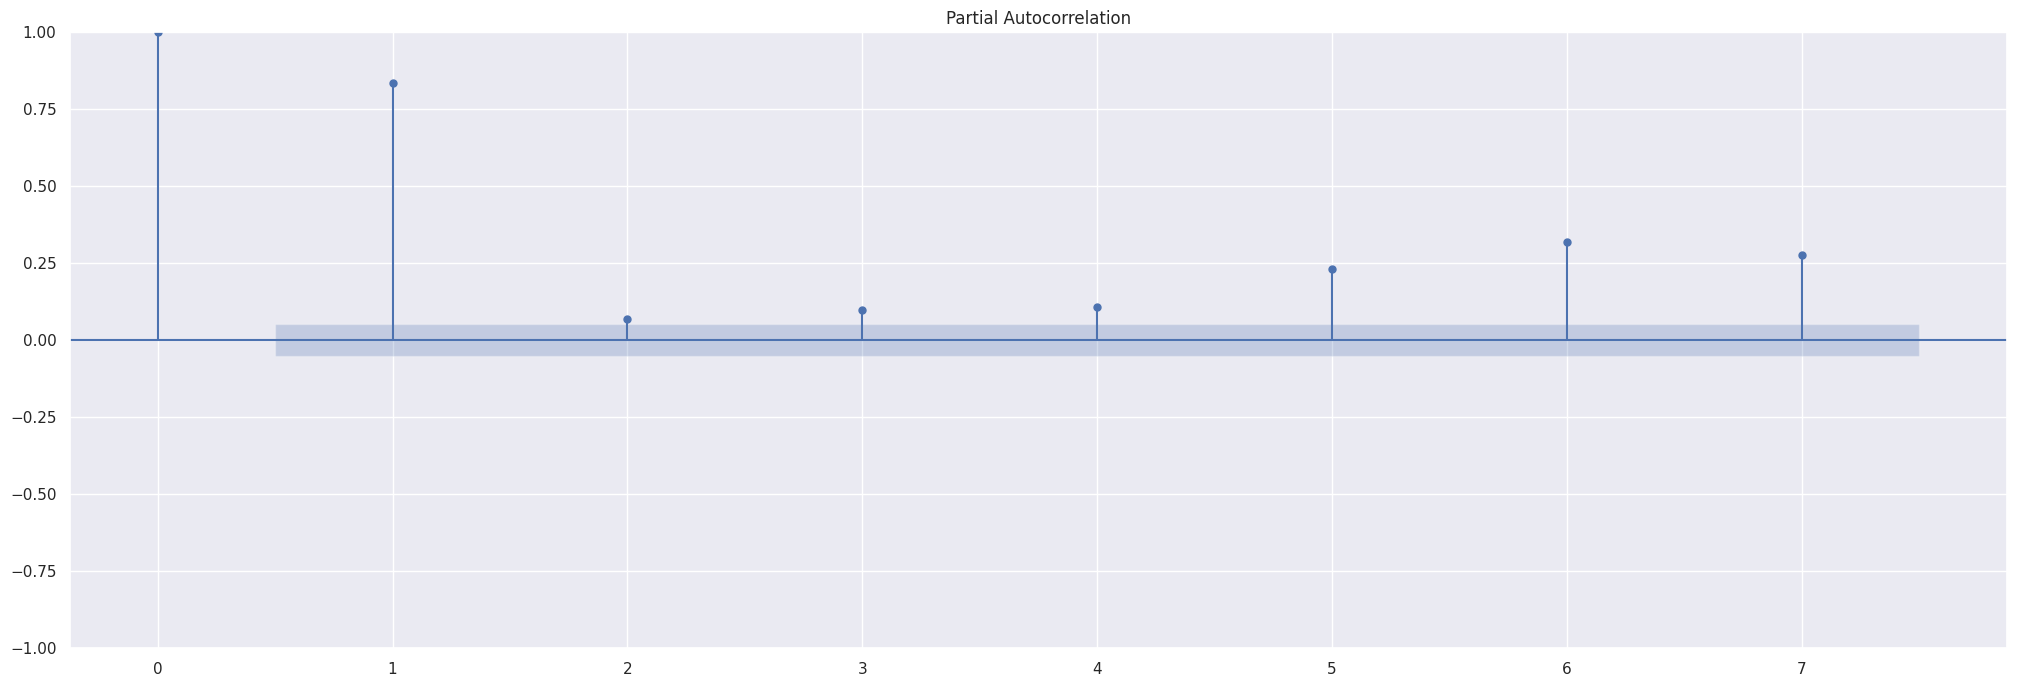

In [13]:
f.plot_pacf(lags=7)
plt.show()

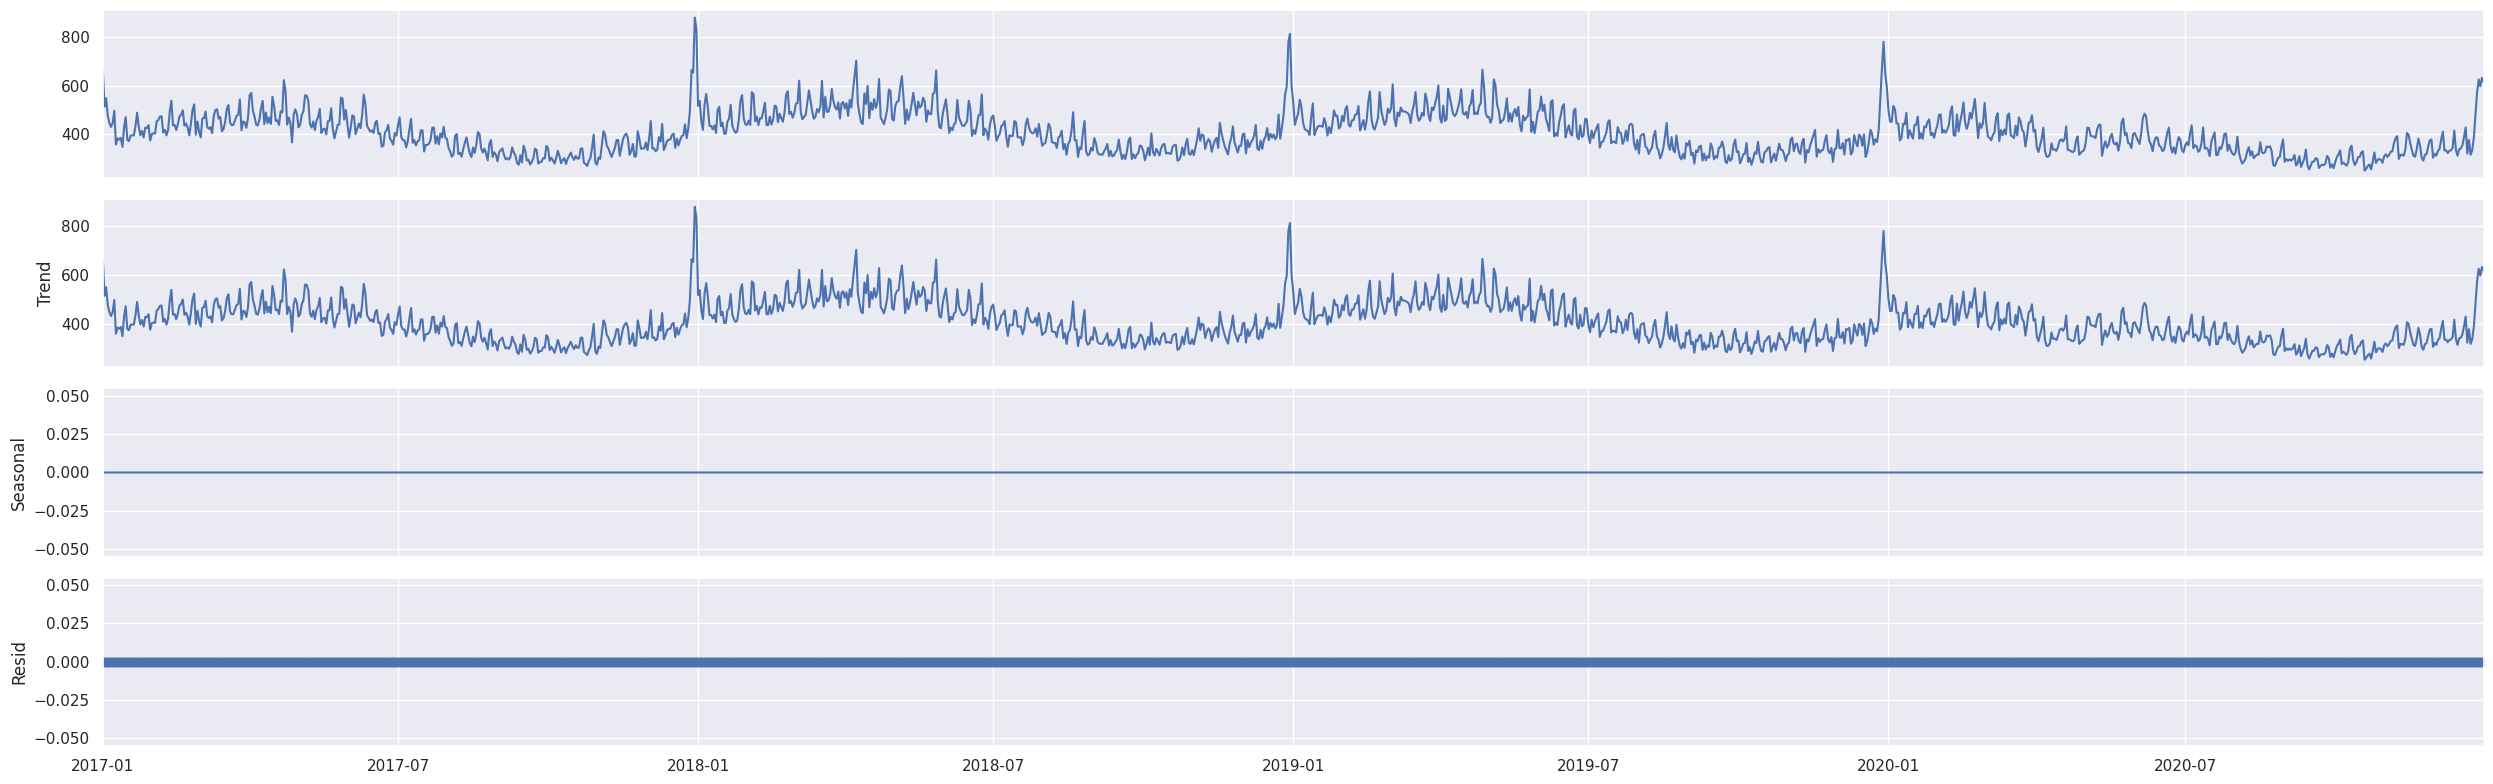

In [14]:
f.seasonal_decompose(model='aditive', extrapolate_trend='freq', period=1).plot()
plt.show()

In [15]:
#Stationarity test
stat, p, _, _, _, _ = f.adf_test(full_res=True)
print(stat, p)

-2.7177853359031627 0.07101086977865066


In [16]:
#LSTM forecasting
f.set_test_length(30)
f.generate_future_dates(90)
f.set_estimator('lstm')

In [18]:
# prompt: suppress all warnings

import warnings
warnings.filterwarnings('ignore')


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2341
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Axes: xlabel='Date', ylabel='Values'>

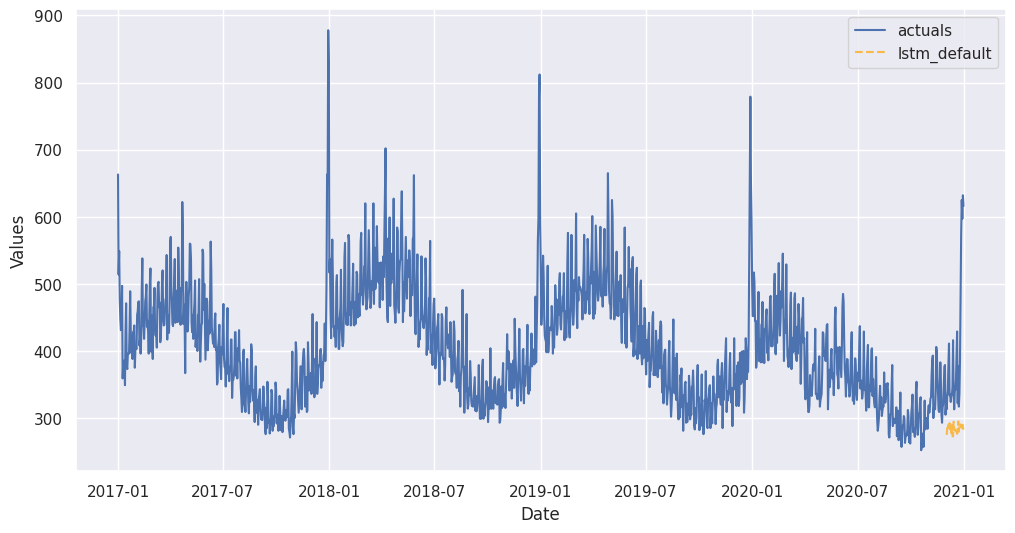

In [19]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2210
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2141
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Axes: xlabel='Date', ylabel='Values'>

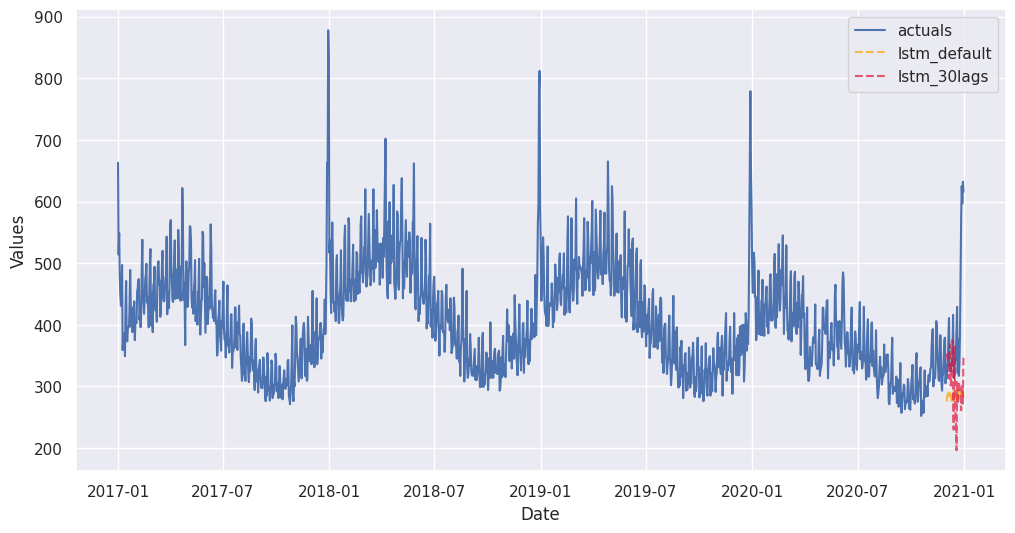

In [20]:
f.manual_forecast(call_me='lstm_30lags',lags=30)
f.plot_test_set(ci=True)

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.2514 - val_loss: 0.1100
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1759 - val_loss: 0.0835
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1101 - val_loss: 0.0773
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0814 - val_loss: 0.0699
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0762 - val_loss: 0.0666
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


Epoch 1/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2568 - val_loss: 0.1199
Epoch 2/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2002 - val_loss: 0.0951
Epoch 3/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1186 - val_loss: 0.0940
Epoch 4/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1016 - val_loss: 0.0928
Epoch 5/5
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0980 - val_loss: 0.0870
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<Axes: xlabel='Date', ylabel='Values'>

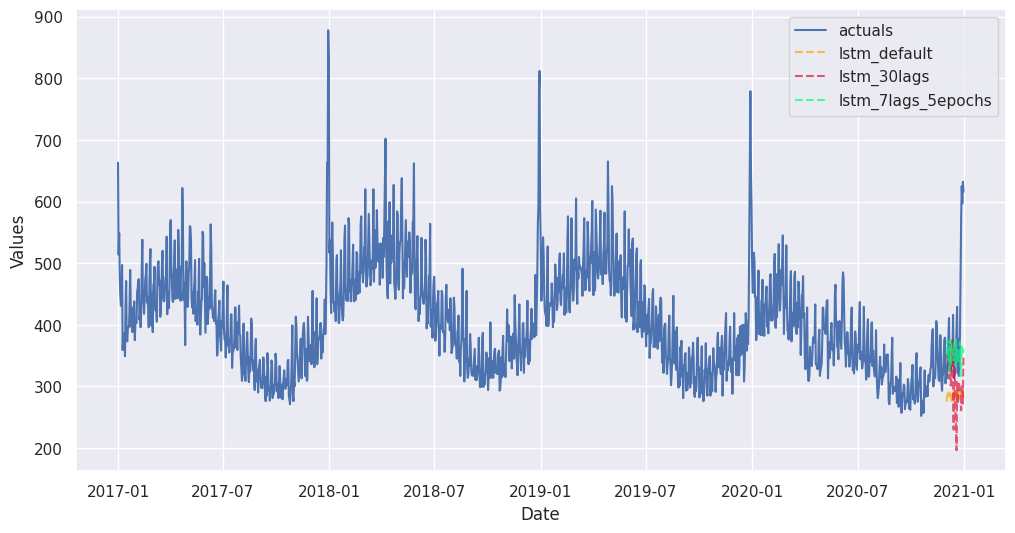

In [21]:
# #General Forecasting with 7 Lags, 5 Epochs
f.manual_forecast(call_me='lstm_7lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.2353 - val_loss: 0.0977
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1125 - val_loss: 0.0612
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0779 - val_loss: 0.0625
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0721 - val_loss: 0.0593
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0702 - val_loss: 0.0612
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0713 - val_loss: 0.0566
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0713 - val_loss: 0.0595
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0702 - val_loss: 0.0582
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0697 - val_loss: 0.0596
Epoch 10/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0700 - val_loss: 0.0567
Epoch 11/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0713 - val_loss: 0.0597
Epoch 12/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.2349 - val_loss: 0.0958
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1190 - val_loss: 0.0722
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1004 - val_loss: 0.0785
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0970 - val_loss: 0.0807
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0952 - val_loss: 0.0777
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0931 - val_loss: 0.0750
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0940 - val_loss: 0.0793
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0907 - val_loss: 0.0825
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0904 - val_loss: 0.0876
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0895 - val_loss: 0.1019
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


<Axes: xlabel='Date', ylabel='Values'>

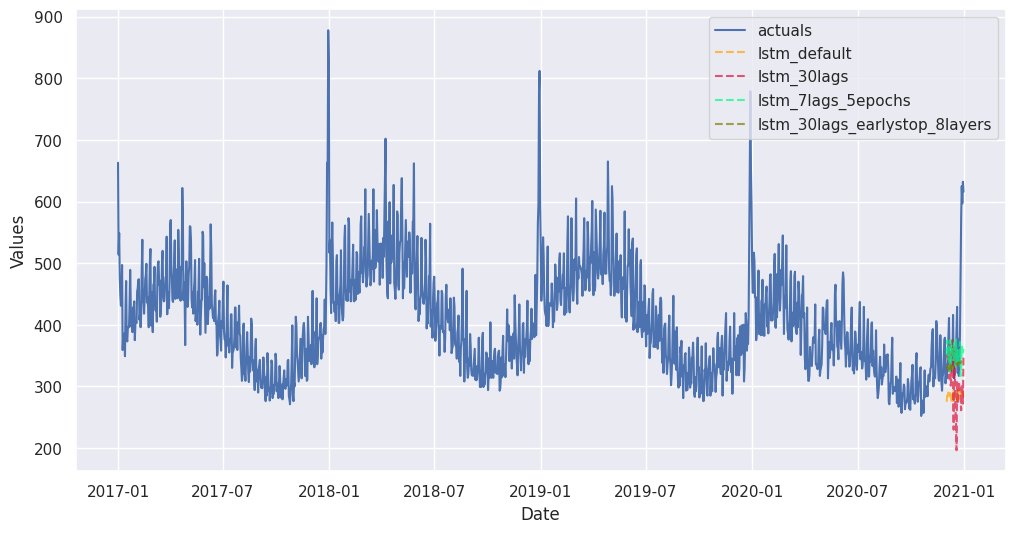

In [22]:
#General Forecasting with EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_30lags_earlystop_8layers',
                  lags=30,
                  epochs=50,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=8),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)


Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.1645 - val_loss: 0.0610
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0736 - val_loss: 0.0685
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0720 - val_loss: 0.0573
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0719 - val_loss: 0.0779
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0768 - val_loss: 0.0610
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0697 - val_loss: 0.0572
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0683 - val_loss: 0.0712
Epoch 8/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0714 - val_loss: 0.0625
Epoch 9/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0689 - val_loss: 0.0558
Epoch 10/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0703 - val_loss: 0.0557
Epoch 11/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0677 - val_loss: 0.0586
Epoch 12/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0

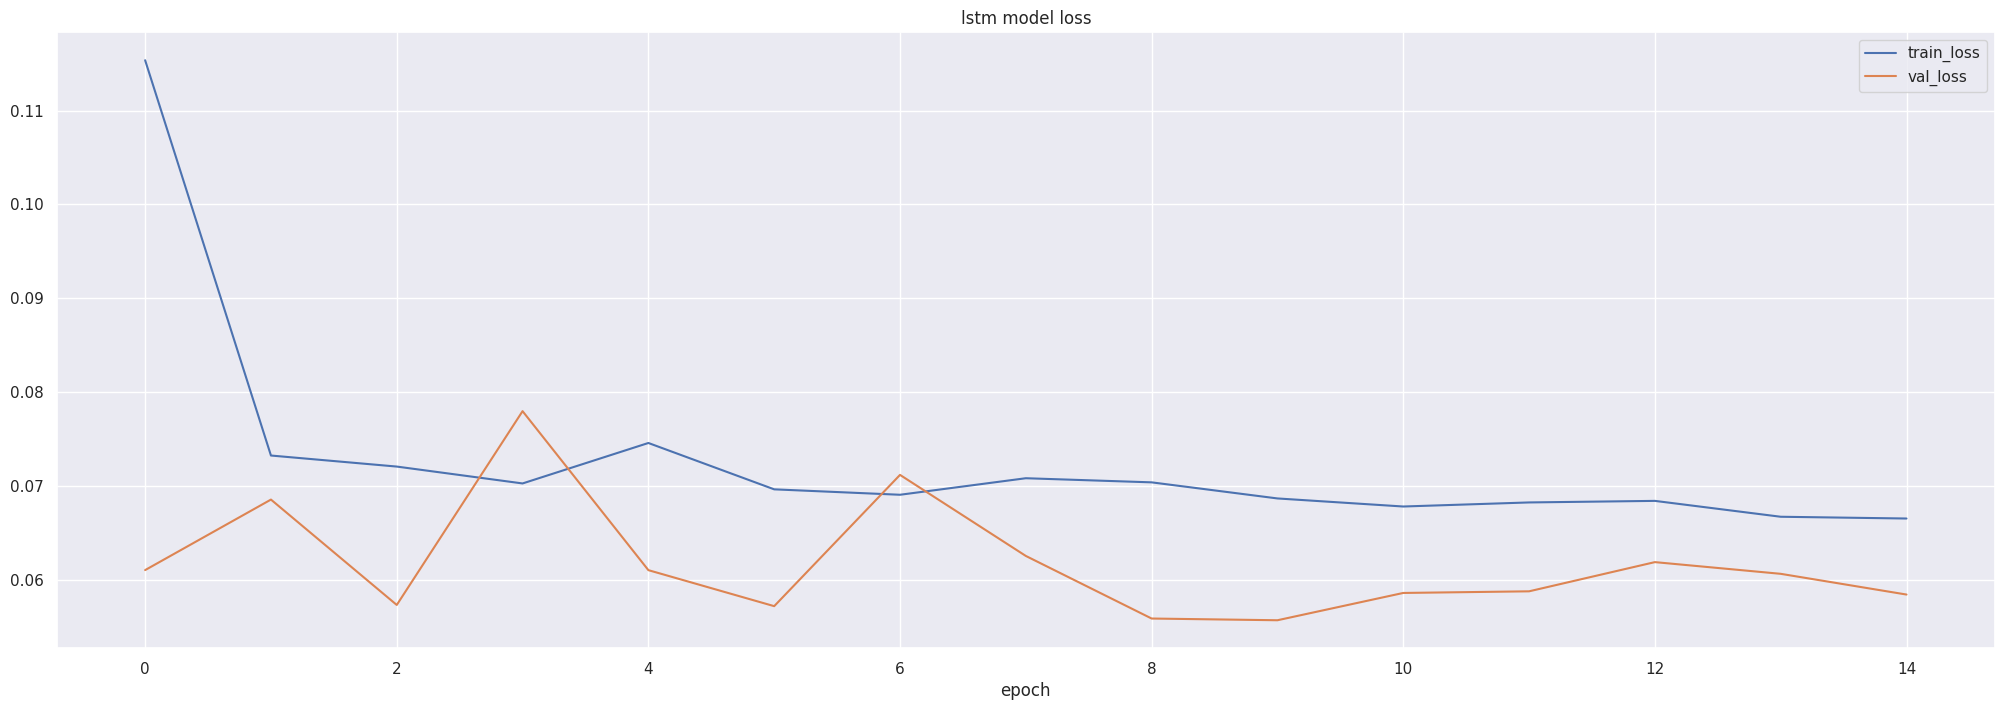

Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1804 - val_loss: 0.0996
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1004 - val_loss: 0.0855
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0966 - val_loss: 0.0914
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0919 - val_loss: 0.0832
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0868 - val_loss: 0.0858
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0795 - val_loss: 0.0783
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0778 - val_loss: 0.0817
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0743 - val_loss: 0.0833
Epoch 9/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0749 - val_loss: 0.0918
Epoch 10/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0734 - val_loss: 0.0799
Epoch 11/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0722 - val_loss: 0.0852
Epoch 12/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

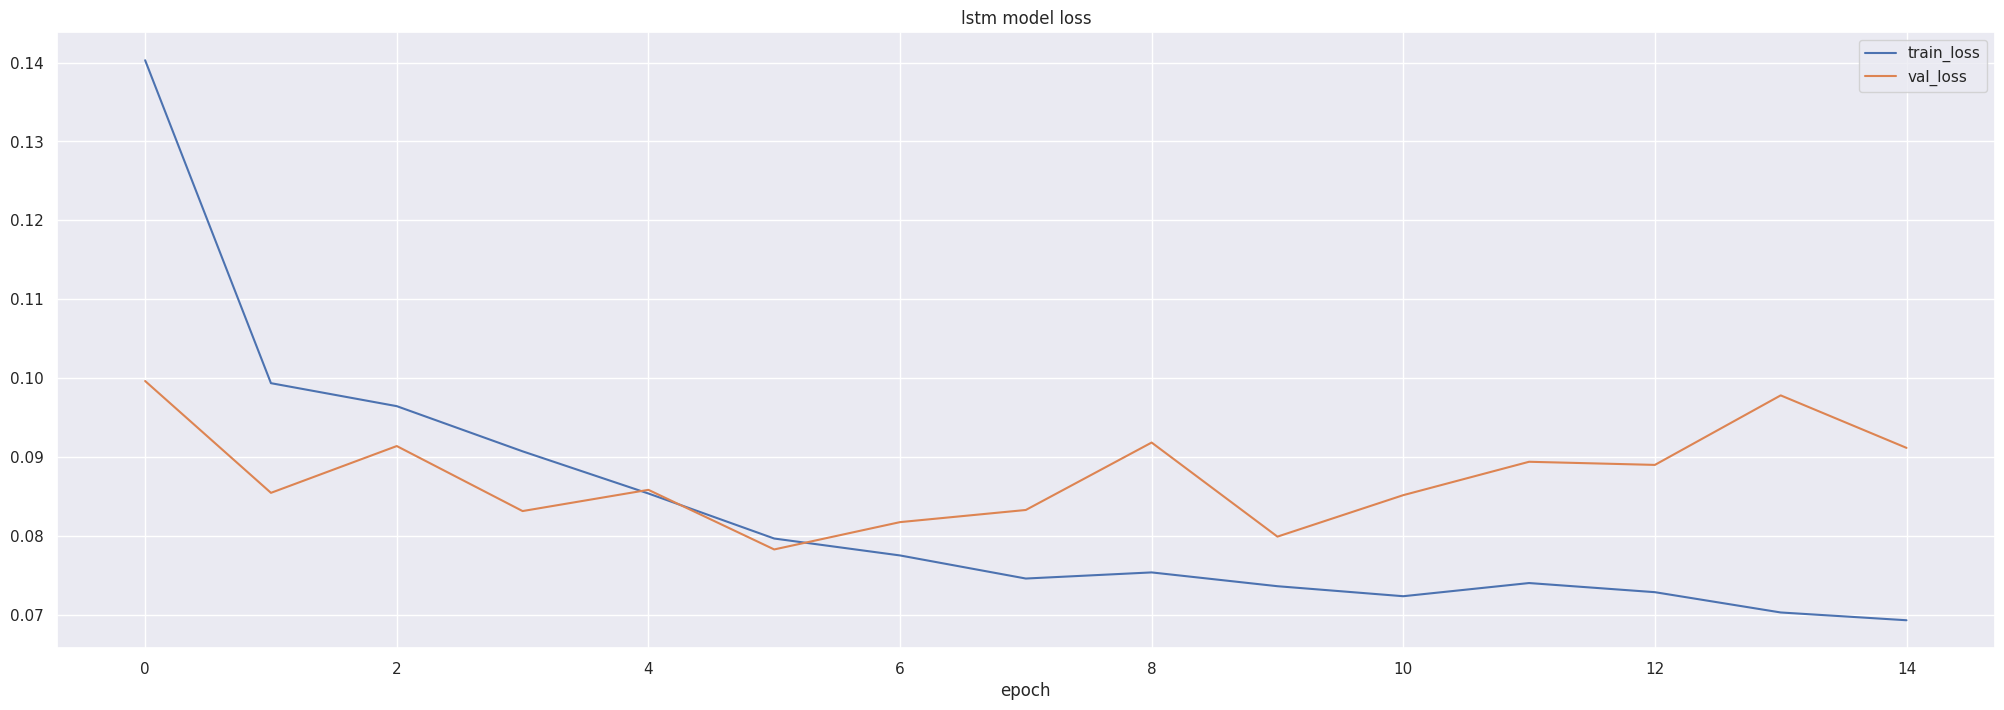

<Axes: xlabel='Date', ylabel='Values'>

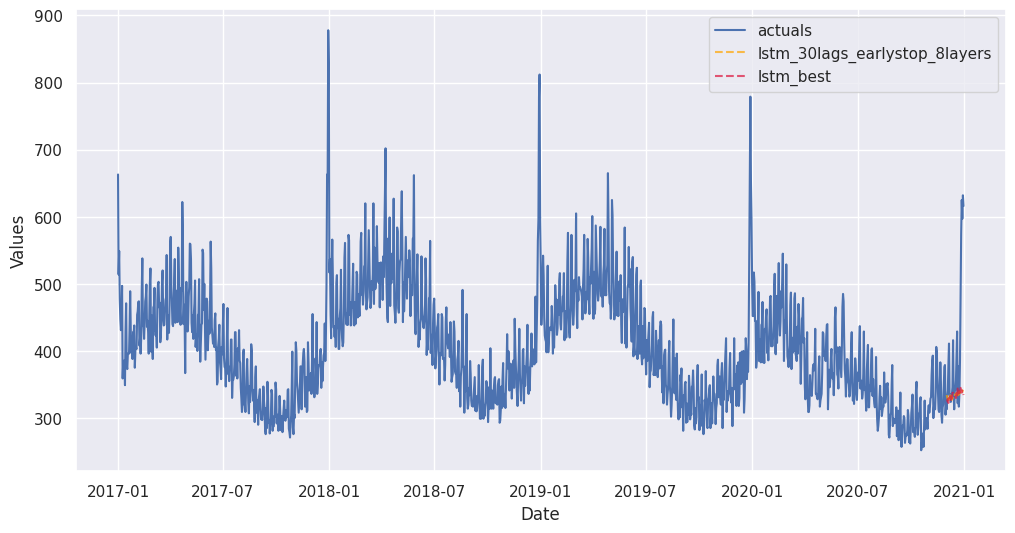

In [25]:
#manual foprecasting
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='TestSetMAPE',models='top_2',ci=True)

In [33]:
#Model Benchmarking

f.set_estimator('mlr')
f.add_ar_terms(7)
f.add_seasonal_regressors('month', 'quarter', dummy=True)
f.add_seasonal_regressors('year')
f.add_time_trend()
f.y = f.y.diff()

<Axes: xlabel='Date', ylabel='Values'>

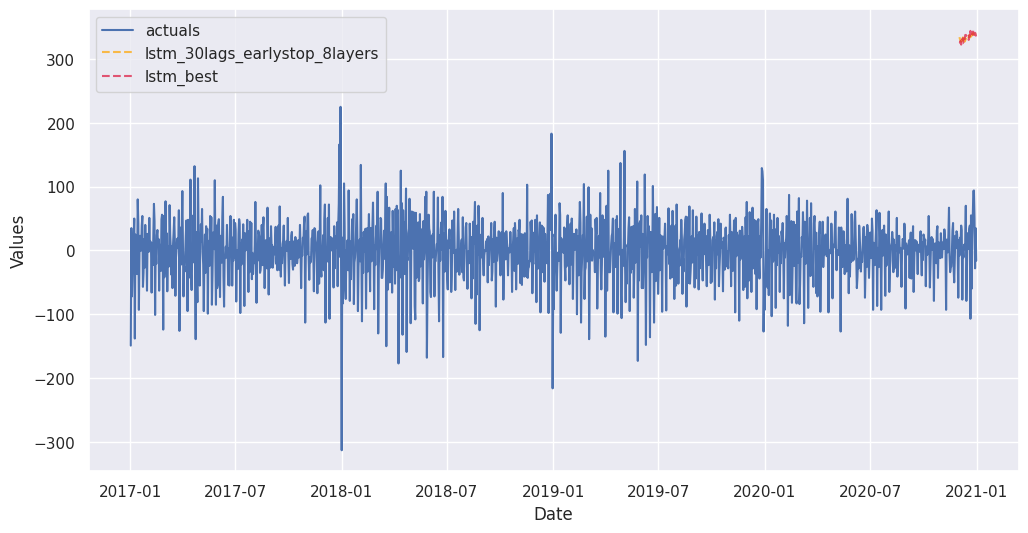

In [38]:
f.manual_forecast()
f.plot_test_set(order_by='TestSetMAPE', models='top_2')

<Axes: xlabel='Date', ylabel='Values'>

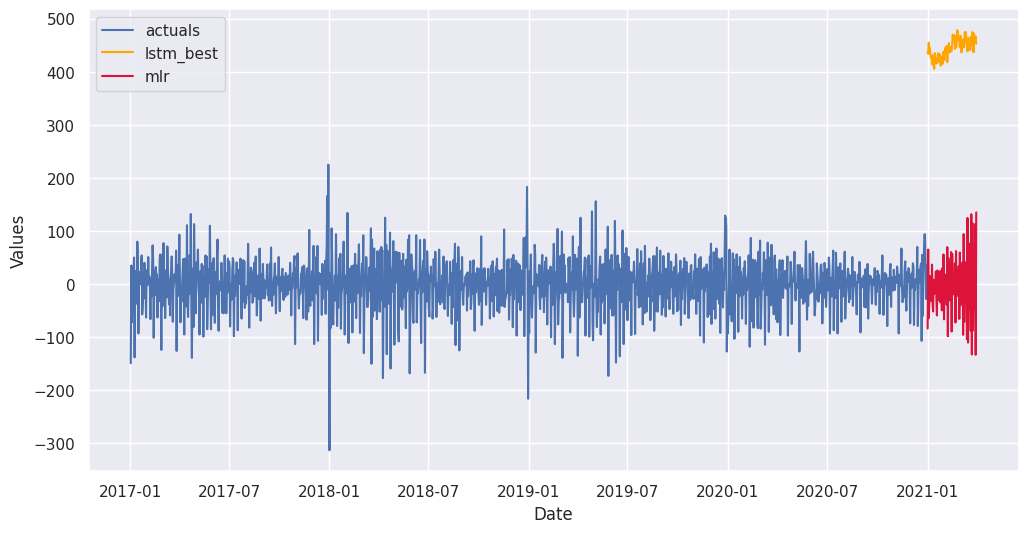

In [36]:
f.plot(models=['mlr','lstm_best'],
       order_by='TestSetMAPE')

In [41]:
f.export('model_summaries',determine_best_by='TestSetMAPE')[
    ['ModelNickname',
     'TestSetMAPE',
     'TestSetRMSE',
     'TestSetR2',
     'best_model']
]

,ModelNickname,TestSetMAPE,TestSetRMSE,TestSetR2,best_model
0,lstm_30lags_earlystop_8layers,0.137784,117.984040,-0.355819,True
1,lstm_best,0.137906,118.446699,-0.366473,False
2,lstm_7lags_5epochs,0.148044,113.323971,-0.250831,False
3,lstm_30lags,0.222380,148.755721,-1.155274,False
4,lstm_default,0.250564,152.258310,-1.257964,False
5,mlr,4.867163,53.296823,-0.309489,False
